# Top 5 Reasons to Use Seaborn for Data Visualizations

The [Seaborn data visualization library in Python][0] provides a simple and intuitive interface for making beautiful plots directly from a Pandas DataFrame. When users arrange their data in tidy form, the Seaborn plotting functions perform the heavy lifting by grouping, splitting, aggregating, and plotting data, often with a single line of code. In this article, I will provide my top five reasons for using the Seaborn library to create data visualizations with Python.

## Reason # 1 - Intuitive API - plotting with a single line of code

The [Seaborn library's API][1] is intuitive, fairly easy to use, and quite uniform. Many visualizations can be created with a single line of code that takes the following form, where `sns` is the Seaborn library, `plotting_func` is a specific plotting function, `df` is the pandas DataFrame where the data is stored, `x` is the string name of the column holding the horizontal values, and `y` is the string name of the column holding the vertical values.

```
sns.plotting_func(data=df, x=x, y=y)
```

Of course there are many optional parameters to create the exact plot you desire, but nearly all plotting functions follow this format and will produce a basic plot with this line. Below, we read in a simple dataset, which each row containing information about a single employee.

[0]: http://seaborn.pydata.org
[1]: https://seaborn.pydata.org/api.html

In [1]:
import pandas as pd
import seaborn as sns

emp = pd.read_csv('employee.csv')
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


A count of the number of employees by department can be done with the `histplot` function.

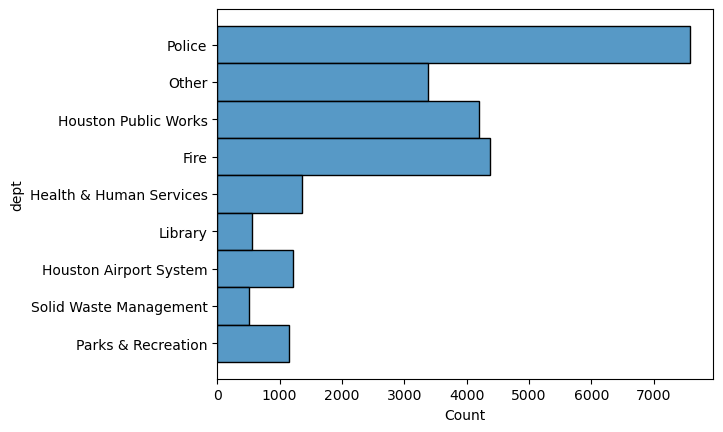

In [2]:
sns.histplot(data=emp, y='dept');

## Reason #2 - Instantly change styles to get more aesthetically pleasing plots

Seaborn has several built in styles that can be set to change the default plotting aesthetics. Here, we change to the 'whitegrid' style.

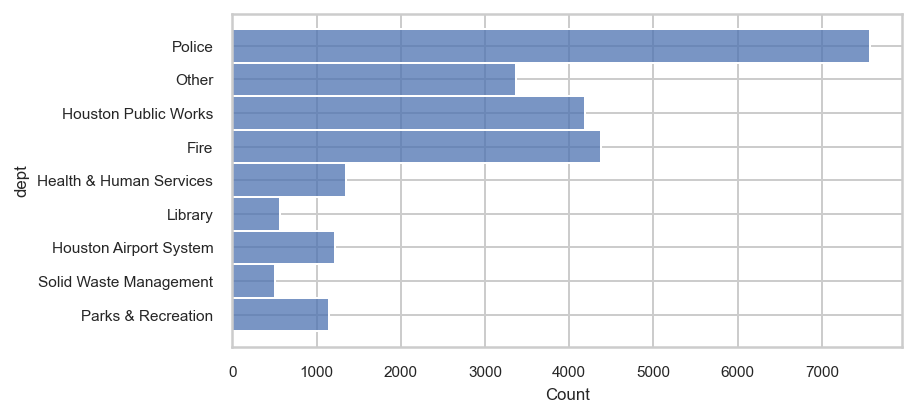

In [3]:
sns.set_theme(style='whitegrid', 
              rc={'figure.dpi': 144, 'figure.figsize': (6, 3)}, 
              font_scale=0.7)

sns.histplot(data=emp, y='dept');

## Reason #3 - Automatically group and aggregate tidy data

Perhaps its most powerful feature, Seaborn automatically groups and aggregates data in tidy form. Below, the data is grouped by sex, and again by race. Within each one of these groups, the average salary is found and plotted as a bar graph.

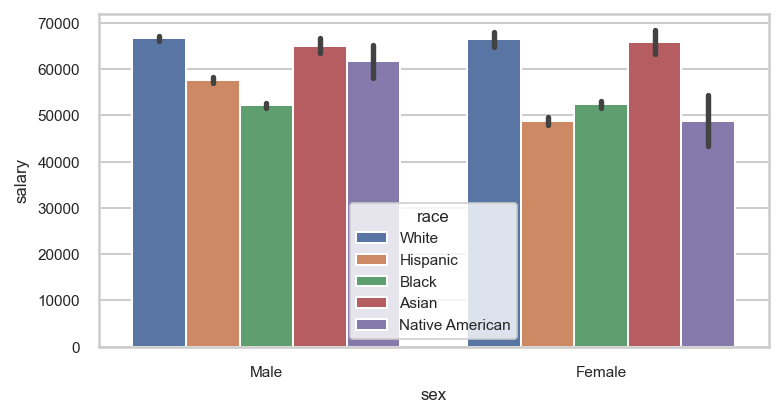

In [4]:
sns.barplot(data=emp, x='sex', y='salary', hue='race');

## Reason #4 - Seaborn helps you think about data in tidy format

Seaborn is easiest to use when your data is structured in [tidy form], which is a format that makes most data analyses easier. With many other data visualization libraries, you'll have to transform your data first into its final form and then make the plot. Below, we use pandas to group and aggregate the data so that it is able to be reproduce the above plot. With Seaborn, we can skip this step due to our data being in tidy form and because of Reason #3.

[0]: https://tidyr.tidyverse.org/articles/tidy-data.html

In [5]:
emp.pivot_table(index='sex', columns='race', 
                values='salary', aggfunc='mean').round(0)

race,Asian,Black,Hispanic,Native American,White
sex,,,,,
Female,65846.0,52417.0,48835.0,48767.0,66412.0
Male,65072.0,52154.0,57637.0,61673.0,66654.0


## Reason #5 - Many options to customize plot

Seaborn plotting functions provide several options to customize your visualization. Some of these options for creating violin plots are used below.

<AxesSubplot:xlabel='salary', ylabel='race'>

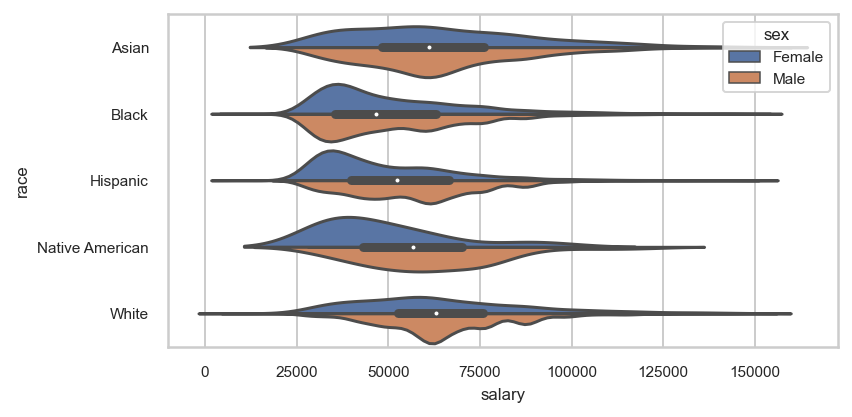

In [6]:
sns.violinplot(data=emp.query('salary < 150_000'), x='salary', y='race', 
               split=True, hue='sex', width=0.9, 
               order=['Asian', 'Black', 'Hispanic', 'Native American', 'White'],
               hue_order=['Female', 'Male'])

## When to use Seaborn

Seaborn is a good choice when you want to produce static, two-dimensional data visualizations with tidy data stored in a pandas DataFrame. It is not suitable for animation or three-dimensional visualizations. If you like using an intuitive API, easily setting new styles, automatically grouping and aggregating tidy data, and customizing your plots, then Seaborn can be a great tool to create the visualizations you desire.